In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Imoprting the dataset
data = pd.read_csv("diabetes_data.csv")

In [3]:
# Checking the fetures and values
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
# Converting to binary 0 and 1

# Replcaing Gender => female to 1 and male to 0

def tran_gender(x):
    if x =='Female':
        return 1
    if x == 'Male':
        return 0      
data['Gender']= data['Gender'].apply(tran_gender)


# Replcaing => Yes to 1 and no to 0

def tran_YesNo(x):
    if x =='Yes':
        return 1
    if x == 'No':
        return 0   
    
data['Polyuria']= data['Polyuria'].apply(tran_YesNo)
data['Polydipsia']= data['Polydipsia'].apply(tran_YesNo) 
data['sudden weight loss']= data['sudden weight loss'].apply(tran_YesNo) 
data['weakness']= data['weakness'].apply(tran_YesNo)   
data['Polyphagia']= data['Polyphagia'].apply(tran_YesNo)
data['Genital thrush']= data['Genital thrush'].apply(tran_YesNo)
data['visual blurring']= data['visual blurring'].apply(tran_YesNo)
data['Itching']= data['Itching'].apply(tran_YesNo)
data['Irritability']= data['Irritability'].apply(tran_YesNo)
data['delayed healing']= data['delayed healing'].apply(tran_YesNo)
data['partial paresis']= data['partial paresis'].apply(tran_YesNo)
data['muscle stiffness']= data['muscle stiffness'].apply(tran_YesNo)
data['Alopecia']= data['Alopecia'].apply(tran_YesNo)
data['Obesity']= data['Obesity'].apply(tran_YesNo)


# Converting the class => Positive to 1 and Negative to 0

def tran_class(x):
    if x =='Positive':
        return 1
    if x == 'Negative':
        return 0  
data['class']= data['class'].apply(tran_class)



In [5]:
# Checking the fetures and values again
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Analyzing the data

### Correlation between attributes

In [6]:
# Correlation between attributes
data.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,-0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,-0.062872,1.000000,0.268894,0.312262,0.281840,0.124490,0.219968,-0.208961,0.208092,0.052496,0.013735,0.101978,0.332288,0.090542,-0.327871,0.005396,0.449233
Polyuria,0.199781,0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,-0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


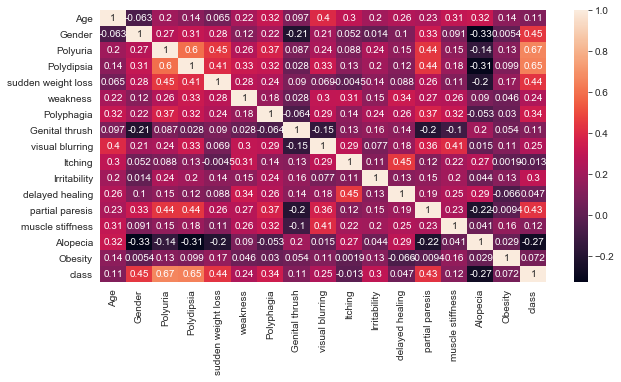

In [7]:
# Visualizing correlation between attributes
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

### Histograms for the each column


<Figure size 2160x2160 with 0 Axes>

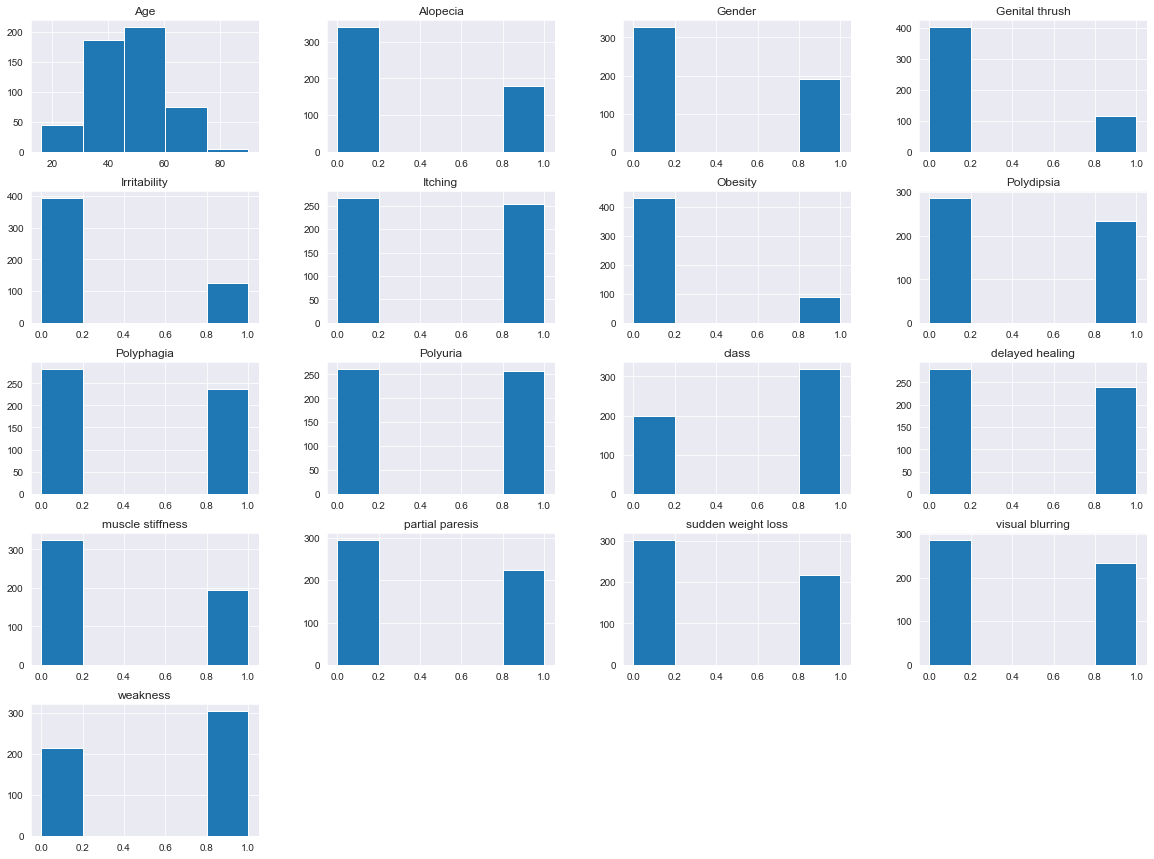

In [8]:
# Plotting a histograms for the each column
plt.figure(figsize=(30,30))
data.hist(bins=5,figsize=(20,15));

## Splitting the data into test/train

In [9]:
# Splitting the data 

from sklearn.model_selection import train_test_split


x = data.drop('class',axis=1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2) #80% training, 20% testing

print (x_train.shape,x_test.shape,y_train.shape, y_test.shape)


(416, 16) (104, 16) (416,) (104,)


# Logistic Reggresion

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('The accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

The accuracy of logistic regression classifier on test set: 0.96


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
# Confusion_matrix
from sklearn.metrics import confusion_matrix

LR_prediction = logreg.predict(x_test)
confusion_matrix = confusion_matrix(y_test.tolist(), LR_prediction.tolist())
print(confusion_matrix)

[[32  2]
 [ 2 68]]


In [12]:
#Error estimator: Mean Squared Error 

from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, LR_prediction)

0.038461538461538464

In [13]:
import numpy as np
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

# Evaluation of the prediction / Error estimator: Cross entropy

print("The binary cross entropy loss is : %f" % log_loss(y_test, LR_prediction))  

The binary cross entropy loss is : 1.328430


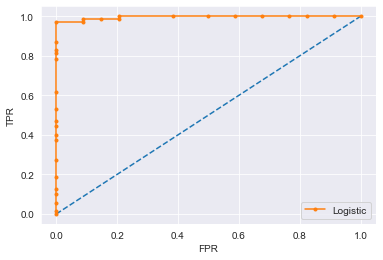

The optimal threshold is: 0.608228 


In [14]:
# ROC curve 

from sklearn.metrics import roc_curve

# calculate the fpr and tpr for all thresholds of the classification
yhat = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat) 
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Logistic')

#labels
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()


# The optimal threshold from the ROC curve:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("The optimal threshold is: %f " % optimal_threshold)  

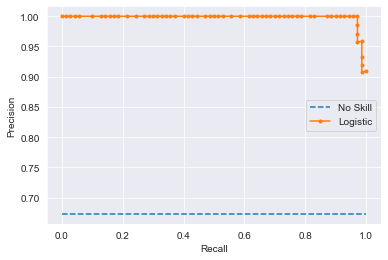

In [15]:
# pr curve for logistic regression model

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# predict probabilities
yhat = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

# SVM

In [2]:
from sklearn.svm import SVC


SVM = SVC(kernel='poly') # Using linear for kernel
SVM.fit(x_train, y_train)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(SVM.score(x_test, y_test)))

NameError: name 'x_train' is not defined

In [17]:
# Confusion_matrix
from sklearn.metrics import confusion_matrix

SVM_prediction = SVM.predict(x_test)
confusion_matrix = confusion_matrix(y_test, SVM_prediction.tolist())
print(confusion_matrix)

[[32  2]
 [ 3 67]]


In [18]:
#Error estimator: Cross entropy

print("The binary cross entropy loss is : %f" % log_loss(y_test, SVM_prediction))  

The binary cross entropy loss is : 1.660533


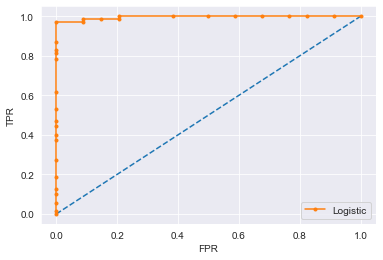

In [19]:
# ROC curve 
from sklearn.metrics import roc_curve

yhat = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat) 
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Logistic')

#labels
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# Ensembles

## Bagging

In [20]:
from sklearn. ensemble import BaggingClassifier

bg = BaggingClassifier( max_samples= 0.25, max_features = 1.0 , n_estimators= 20 )
bg.fit(x_train, y_train)
print('Accuracy of Bagging classifier on test set: {:.2f}'.format(bg.score(x_test, y_test)))

Accuracy of Bagging classifier on test set: 0.98


In [21]:
# Confusion_matrix
from sklearn.metrics import confusion_matrix

bg_prediction = bg.predict(x_test)
confusion_matrix = confusion_matrix(y_test.tolist(), bg_prediction.tolist())
print(confusion_matrix)

[[34  0]
 [ 2 68]]


In [22]:
#Error estimator: Cross entropy

print("The binary cross entropy loss is : %f" % log_loss(y_test, bg_prediction))  

The binary cross entropy loss is : 0.664207


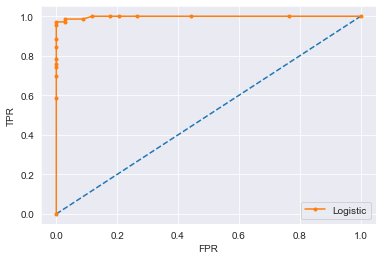

In [23]:
# ROC curve 
from sklearn.metrics import roc_curve

yhat = bg.predict_proba(x_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat) 
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Logistic')

#labels
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## AdaBoost

In [24]:
from sklearn. ensemble import BaggingClassifier, AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(adb.score(x_test, y_test)))

Accuracy of AdaBoost classifier on test set: 0.95


In [25]:
# Confusion_matrix
from sklearn.metrics import confusion_matrix

adb_prediction = adb.predict(x_test)
confusion_matrix = confusion_matrix(y_test.tolist(), adb_prediction.tolist())
print(confusion_matrix)

[[32  2]
 [ 3 67]]


In [26]:
#Error estimator: Cross entropy

print("The binary cross entropy loss is : %f" % log_loss(y_test, adb_prediction)) 

The binary cross entropy loss is : 1.660533


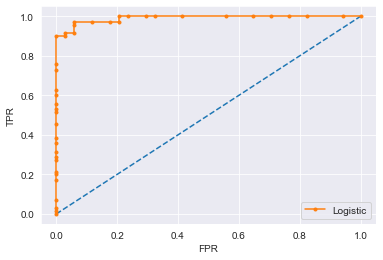

In [27]:
# ROC curve 
from sklearn.metrics import roc_curve

yhat = adb.predict_proba(x_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat) 
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Logistic')

#labels
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# Neural Network 

In [32]:
from sklearn.neural_network import MLPClassifier
from scipy.special import softmax
from numpy import exp
 

nn = MLPClassifier(activation='tanh',solver='sgd',hidden_layer_sizes=(10,10,10),random_state=1) 
# I used the tanh, and Gradient decent (solver='sgd'), assined 3 layers, each 10 neourns.
nn.fit(x_train,y_train)
print('Accuracy of Neural Network classifier on test set: {:.2f}'.format(nn.score(x_test, y_test)))

Accuracy of Neural Network classifier on test set: 0.82


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
# Confusion_matrix
from sklearn.metrics import confusion_matrix

nn_prediction = nn.predict(x_test)
confusion_matrix = confusion_matrix(y_test.tolist(), nn_prediction.tolist())
print(confusion_matrix)

[[33  1]
 [18 52]]


In [30]:
#Error estimator: Cross entropy

print("The binary cross entropy loss is : %f" % log_loss(y_test, nn_prediction)) 

The binary cross entropy loss is : 6.309976


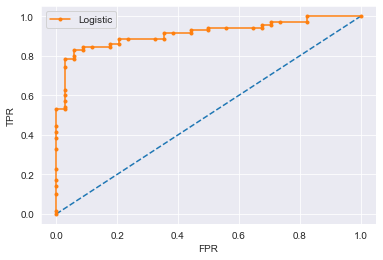

In [31]:
# ROC curve 
from sklearn.metrics import roc_curve

# calculate the fpr and tpr for all thresholds of the classification
yhat = nn.predict_proba(x_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat) 
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Logistic')

#labels
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()